In [1]:
using DataFrames

# load the table
df = readtable(joinpath(Pkg.dir("Plots"), "examples", "meetup", "nba_2013.csv"))
size(df)

(481,31)

In [2]:
# show the first row
df[1,:]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg_,x3p,x3pa,x3p_,x2p,x2pa,x2p_,efg_,ft,fta,ft_,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
1,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266666666666667,62,126,0.492063492063492,0.482,35,53,0.66,72,144,216,28,23,26,30,122,171,2013-2014,2013


In [3]:
# get the header names
nms = names(df)

31-element Array{Symbol,1}:
 :player      
 :pos         
 :age         
 :bref_team_id
 :g           
 :gs          
 :mp          
 :fg          
 :fga         
 :fg_         
 :x3p         
 :x3pa        
 :x3p_        
 ⋮            
 :ft_         
 :orb         
 :drb         
 :trb         
 :ast         
 :stl         
 :blk         
 :tov         
 :pf          
 :pts         
 :season      
 :season_end  

In [16]:
# many algorithms with online (streaming) implementations
using OnlineStats

# create a matrix from the columns of the dataframe
cnames = [:x3p,:stl,:trb,:age,:pts]
M = Matrix{Float64}(df[cnames])

# compute the covariance (uses EqualWeighting by default... should match classic covariance calculations)
C = CovarianceMatrix(M)

OnlineStat: OnlineStats.CovarianceMatrix{OnlineStats.EqualWeighting}
 *        μ:  [39.61330561330561,39.28066528066528,218.62785862785864,26.50935550935551,516.5821205821206]
 *        Σ:  5x5 Array{Float64,2}:
  2586.3      1047.38      1863.08     10.8057   15678.2      
  1047.38     1209.9       4028.25     -4.13492  13048.6      
  1863.08     4028.25     40142.7     -11.3142   68420.4      
    10.8057     -4.13492    -11.3142   17.6254     -23.5221   
 15678.2     13048.6      68420.4     -23.5221       2.21297e5
 *     nobs:  481

[Plots.jl] Switched to backend: gadfly

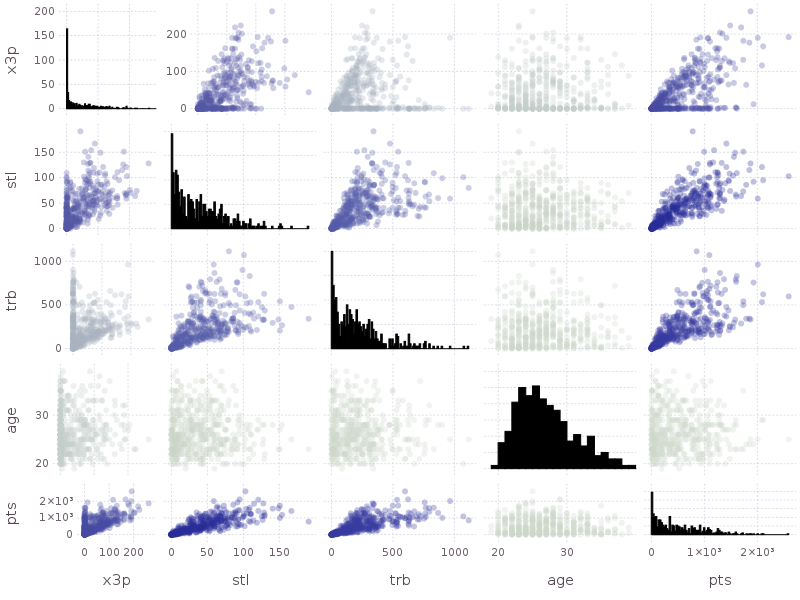

In [17]:
# choose the package Gadfly as the backend for Plots
using Plots
gadfly()

# do a correlation scatter plot
corrplot(M, cor(C), labels = cnames)

In [18]:
# plot players by cluster
using Clustering
kmmodel = kmeans(M', 5)

Clustering.KmeansResult{Float64}(5x5 Array{Float64,2}:
  128.583    9.04124   81.55     32.6316   36.8947
   92.0556  10.6495    69.075    65.5526   41.3308
  400.528   57.5825   289.275   643.316   240.466 
   26.0     26.3814    26.9      25.7895   26.8045
 1567.75    99.5412   883.688  1092.58    454.985 ,[2,5,5,1,5,2,1,5,3,5  …  5,2,5,2,5,3,3,1,5,5],[30391.9,45882.0,14602.5,78974.7,19160.4,5248.01,150702.0,29600.3,42014.3,5721.47  …  10229.1,1858.62,6363.53,4165.91,16355.7,8667.77,86349.9,35528.0,15286.6,6772.79],[36,194,80,38,133],[36.0,194.0,80.0,38.0,133.0],1.5403008988576995e7,6,true)

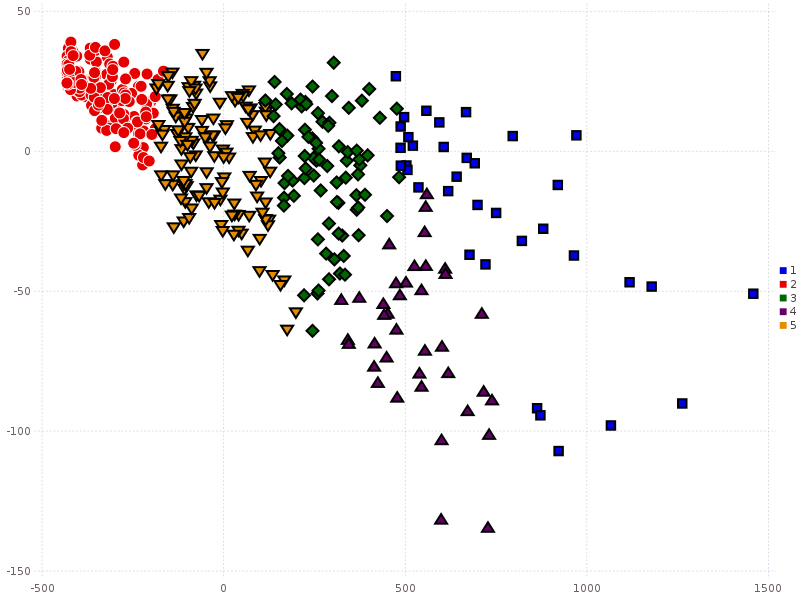

In [26]:
# reduce to 2 dimensions
using MultivariateStats
pcamodel = pca(C, maxoutdim=2)
xy = transform(pcamodel, M')'
x, y = xy[:,1], xy[:,2];

# plot a scatter plot, grouping by the clusters obtained in kmeans
scatter(x, y, group = assignments(kmmodel), marker=:auto)